In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, '/SSF')
from DejaVu.explib import get_eval_results
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.min_rows = 100
eval_rets, melted = get_eval_results()
eval_rets

Using backend: pytorch


download finished


,Method,Dataset,备注,A@1,A@2,A@3,A@5,MAR,Time (s),实验路径,command,commit
1,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,65.62,93.75,96.88,100.00,1.44,689.115095,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/1975683694...
2,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,78.12,90.62,90.62,90.62,1.78,1266.835076,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
3,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,90.62,96.88,96.88,100.00,1.16,761.576768,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
4,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,674.506719,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
5,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,849.394423,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
6,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,84.38,96.88,100.00,100.00,1.19,709.856903,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
7,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,59.38,78.12,87.50,96.88,1.84,718.702528,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
8,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,824.153796,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
9,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,81.25,100.00,100.00,100.00,1.19,2025.395798,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...
10,GRU+GAT-H4-L8+BAL,AIOPS20-phase1,NaN,75.00,90.62,93.75,93.75,1.53,1744.798878,/data/SSF/experiment_outputs/run_GAT_node_clas...,python exp/run_GAT_node_classification.py -H=4...,https://github.com/lizeyan/SSF/tree/d104c57ee8...


In [2]:
import re

REGEX = r'^(DFE(?P<DFE>[\d.]+)\+)?GRU\+GAT-H4-L8\+BAL$'
def __match_param(name: str):
    if __match := re.match(REGEX, name):
        __gd = dict(__match.groupdict())
        # print(__gd)
        return 0 if __match['DFE'] is None else float(__match['DFE'])
    else:
        return 0
    
def match(the_df):
    the_df = the_df.copy()
    the_df['DFE'] = the_df.Method.map(
        lambda name: __match_param(name)
    )
    for m in ['MAR', 'A@1', 'A@2', 'A@3', 'A@5']:
        the_df[m] = pd.to_numeric(the_df[m], errors='coerce')
    return the_df

In [3]:
df1 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase1'
)])
df1 = df1.groupby(['DFE', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
df2 = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS20-phase2'
)])

df2 = df2.groupby(['DFE', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean()
dfa = (df1 * 32 + df2 * 46) / (32 + 46)
dfa = dfa.reset_index()
display(dfa)

,DFE,Method,MAR,A@1,A@2,A@3,A@5
0,0.00,GRU+GAT-H4-L8+BAL,1.656859,77.178667,90.383654,93.397115,96.282474
1,0.01,DFE0.01+GRU+GAT-H4-L8+BAL,2.265051,71.409795,84.743000,88.717923,94.103462
2,0.02,DFE0.02+GRU+GAT-H4-L8+BAL,2.025256,75.769615,88.589615,92.307128,95.769667
3,0.04,DFE0.04+GRU+GAT-H4-L8+BAL,2.318128,69.999769,86.539179,90.768897,94.231308
4,0.08,DFE0.08+GRU+GAT-H4-L8+BAL,2.424718,68.205846,83.975128,88.717308,93.076744
5,0.16,DFE0.16+GRU+GAT-H4-L8+BAL,2.516368,64.388353,80.184473,86.381689,93.090803
6,0.32,DFE0.32+GRU+GAT-H4-L8+BAL,2.523718,63.975051,83.204769,87.821308,92.821231
7,0.64,DFE0.64+GRU+GAT-H4-L8+BAL,3.130282,60.256462,79.487974,86.538872,93.461718


In [4]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'AIOPS21-B'
)])

dfb = df.groupby(['DFE', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
dfb

,DFE,Method,MAR,A@1,A@2,A@3,A@5
0,0.00,GRU+GAT-H4-L8+BAL,5.027000,66.212000,71.213000,75.606000,79.242000
1,0.01,DFE0.01+GRU+GAT-H4-L8+BAL,5.816000,64.395000,72.121000,75.151000,79.697000
2,0.02,DFE0.02+GRU+GAT-H4-L8+BAL,5.568000,63.790000,69.547000,74.546000,79.091000
3,0.04,DFE0.04+GRU+GAT-H4-L8+BAL,6.301111,63.974444,72.053333,75.925556,79.796667
4,0.08,DFE0.08+GRU+GAT-H4-L8+BAL,7.620000,63.636000,72.272000,75.910000,79.091000
5,0.16,DFE0.16+GRU+GAT-H4-L8+BAL,9.435000,65.002000,71.969000,75.455000,79.241000
6,0.32,DFE0.32+GRU+GAT-H4-L8+BAL,8.819000,61.063000,70.454000,74.394000,77.727000
7,0.64,DFE0.64+GRU+GAT-H4-L8+BAL,12.833000,61.971000,69.697000,72.880000,75.455000


In [5]:
df = match(eval_rets[(
      eval_rets.Method.map(lambda _: re.match(REGEX, _) is not None)
) & (
    eval_rets.Dataset == 'CCB-Oracle'
)])

dfc = df.groupby(['DFE', 'Method'])[['MAR', 'A@1', 'A@2', 'A@3', 'A@5']].mean().reset_index()
dfc

,DFE,Method,MAR,A@1,A@2,A@3,A@5
0,0.00,GRU+GAT-H4-L8+BAL,1.697,61.842,82.632,90.791,96.318
1,0.01,DFE0.01+GRU+GAT-H4-L8+BAL,1.672,61.842,83.420,91.315,97.896
2,0.02,DFE0.02+GRU+GAT-H4-L8+BAL,1.914,58.683,82.368,89.737,95.002
3,0.04,DFE0.04+GRU+GAT-H4-L8+BAL,1.963,62.632,81.843,88.422,95.792
4,0.08,DFE0.08+GRU+GAT-H4-L8+BAL,1.959,58.157,81.841,89.210,95.792
5,0.16,DFE0.16+GRU+GAT-H4-L8+BAL,2.266,60.262,82.367,88.157,95.266
6,0.32,DFE0.32+GRU+GAT-H4-L8+BAL,2.255,61.315,81.842,90.790,96.055
7,0.64,DFE0.64+GRU+GAT-H4-L8+BAL,2.325,55.001,80.525,86.317,94.739


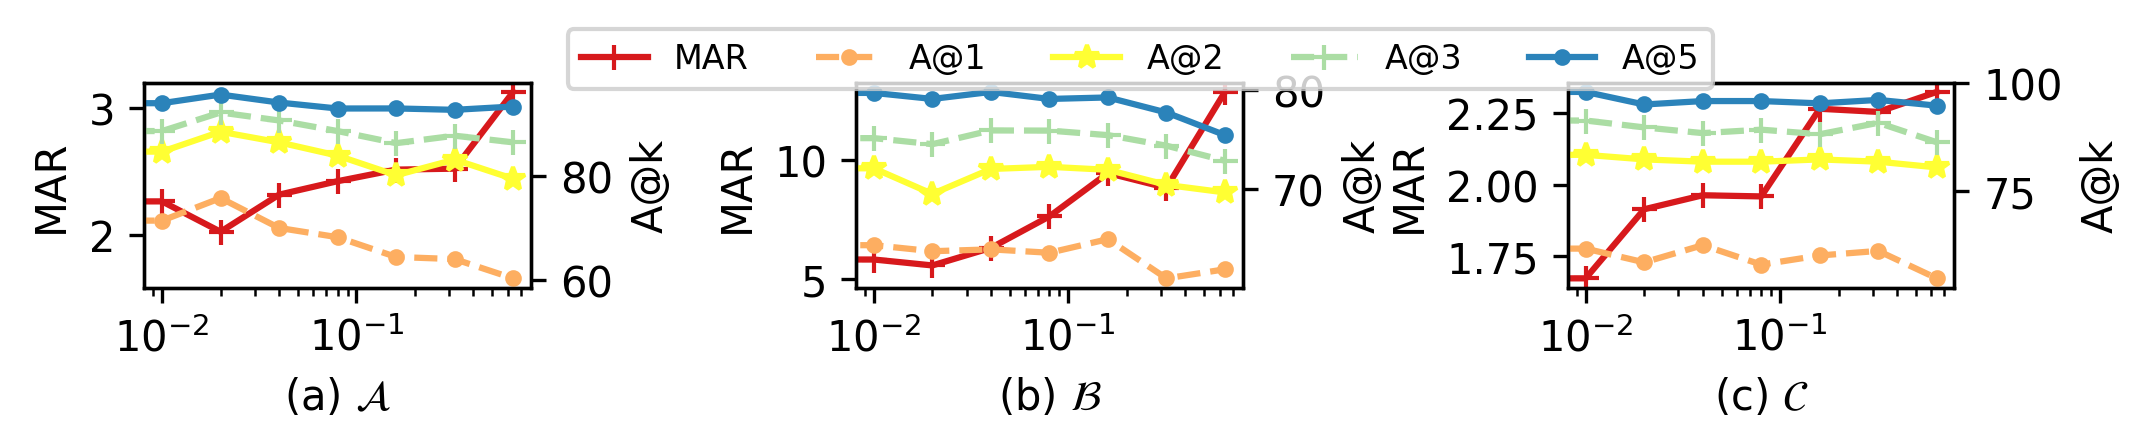

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from explib import get_line_style, legend_db
import matplotlib.ticker as mticker

def plot_impact_of_dfe(data, ax, fig, legend=False):
    data = data.copy()
    # data = data[data.Z.isin({2, 3, 4, 8, 16, 32, 64})]
    data = data.sort_values('DFE')
    p1, = ax.plot(data.DFE, data.MAR, marker='+', ls='-', label='MAR', c=legend_db.colors[0])
    ax.set_ylabel("MAR")
    ax.set_xscale("log")
    
    
    ax2 = ax.twinx()
    p2, = ax2.plot(data.DFE, data['A@1'], marker='.', ls='--', label='A@1', c=legend_db.colors[1])
    p3, = ax2.plot(data.DFE, data['A@2'], marker='*', ls='-', label='A@2', c=legend_db.colors[2])
    p4, = ax2.plot(data.DFE, data['A@3'], marker='+', ls='--', label='A@3', c=legend_db.colors[3])
    p5, = ax2.plot(data.DFE, data['A@5'], marker='.', ls='-', label='A@5', c=legend_db.colors[4])
    
    ax2.set_ylabel("A@k")
#     ax.set_xticks([2, 3, 4, 8, 16, 32, 64], minor=False)
#     ax.set_xticklabels(["2", "3", "4", "8", "16", "32", "64"], minor=False)
#     ax.xaxis.set_major_locator(mticker.FixedLocator([2, 3, 4, 8, 16, 32, 64]))
    if legend:
        fig.legend(handles=[p1, p2, p3, p4, p5], bbox_to_anchor=(0.25, 0.88), loc='lower left', prop={'size': 8}, ncol=5)
    
#     fig.legend(loc="upper right", bbox_to_anchor=(1, 0.6), bbox_transform=ax.transAxes, ncol=3, fontsize='small')
#     plt.xticks([2, 3, 4, 5, 6], [2, 3, 4, 5, 6])
#     plt.xlim([2, 65])
#     plt.xscale("log")
#     plt.show()
    # plt.close(fig)
    return ax, ax2

fig, axes = plt.subplots(1, 3, figsize=(7, 1.2), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_dfe(dfa, axes[0], fig, legend=True)
# ax2.get_yaxis().set_visible(False)
ax3, ax4 = plot_impact_of_dfe(dfb, axes[1], fig)
# ax4.get_yaxis().set_visible(False)
ax5, ax6 = plot_impact_of_dfe(dfc, axes[2], fig)
# ax2.get_shared_y_axes().join(ax2, ax4, ax6)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
ax5.set_xlabel("(c) $\mathcal{C}$")
plt.tight_layout(pad=0.1)
plt.savefig("/SSF/output/impact_of_dfe/impact_of_dfe.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)

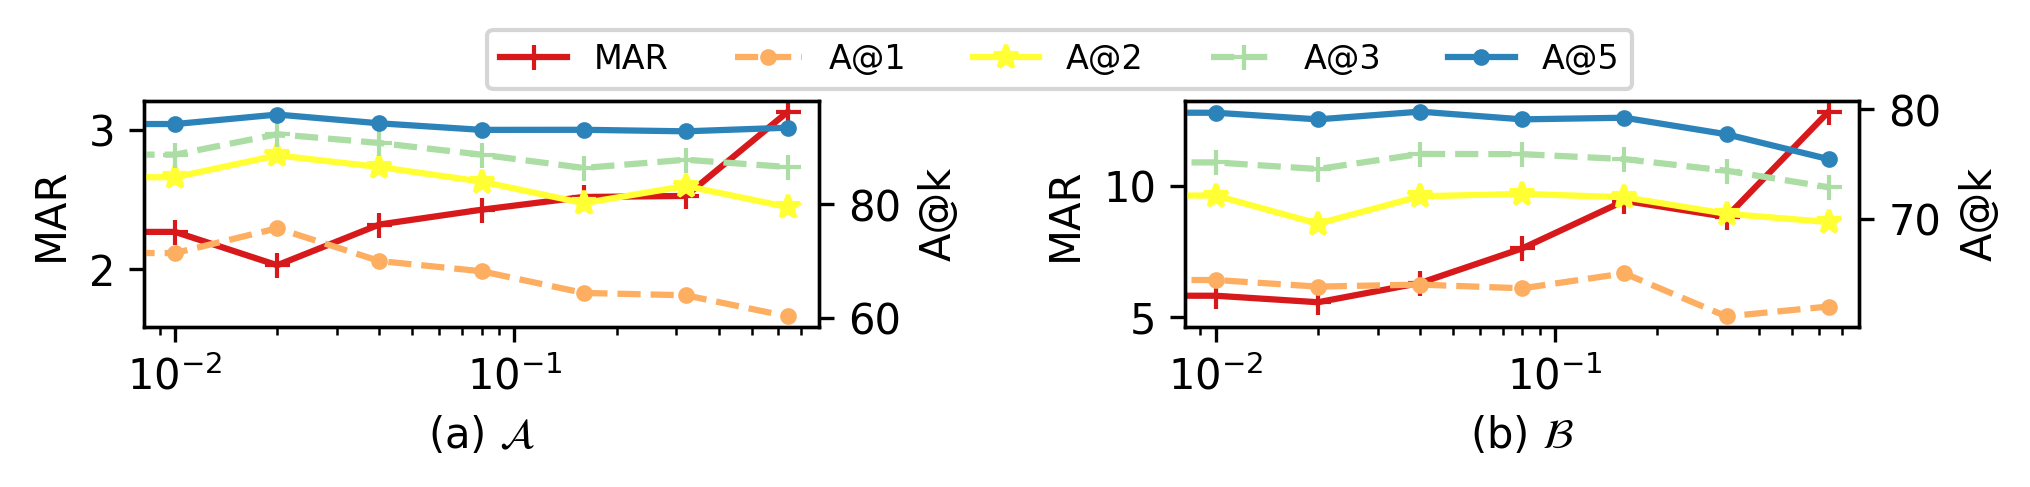

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(7, 1.5), dpi=300, sharey=False)
ax1, ax2 = plot_impact_of_dfe(dfa, axes[0], fig, legend=True)
# ax2.get_yaxis().set_visible(False)
ax3, ax4 = plot_impact_of_dfe(dfb, axes[1], fig)
# ax4.get_yaxis().set_visible(False)
ax1.set_xlabel("(a) $\mathcal{A}$")
ax3.set_xlabel("(b) $\mathcal{B}$")
plt.tight_layout()
plt.savefig("/SSF/output/impact_of_dfe/impact_of_dfe.pdf", bbox_inches='tight', pad_inches=0)
plt.show(fig)
plt.close(fig)